## Question 1
For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001. 
```x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])```

```y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])``` 

Assume learning rate =0.001. Plot the graph of epoch in x axis and loss in y axis.

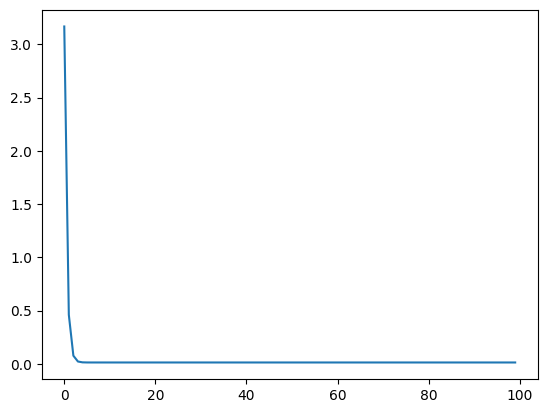

In [17]:
import torch
from matplotlib import pyplot as plt

x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

b = torch.rand([1], requires_grad=True)
w = torch.rand([1], requires_grad=True)

learning_rate = 0.001 

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += torch.sum((y_p - y[j]) ** 2)
    
    loss = loss / len(x)
    loss_list.append(loss.item())
    
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    #print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))

plt.plot(loss_list)
plt.show()


## Question 2
Find the value of w.grad, b.grad using analytical solution for the given linear regression
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same
and verify the values of w.grad , b.grad and updated parameter values for two epochs.
Consider the difference between predicted and target values of y is defined as (yp-y).

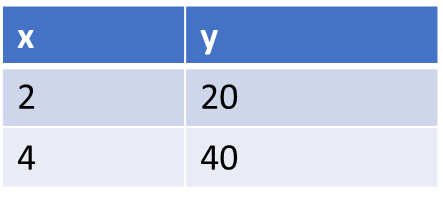

The parameters are w=1.1740000247955322, b=1.0520000457763672, and loss=757.0
The parameters are w=1.344208002090454, b=1.1028521060943604, and loss=724.3797607421875


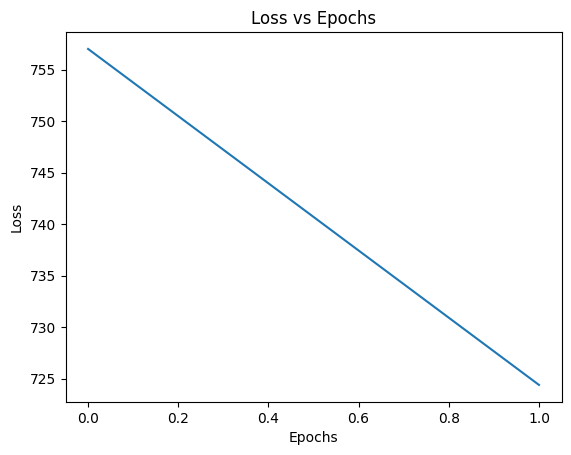

In [68]:
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

b = torch.tensor(1.0)
w = torch.tensor(1.0)
learning_rate = 0.001

def grad_descent(w, b):
    loss_list = []
    for epochs in range(2):
        loss = 0.0
        dw = 0.0
        db = 0.0
        for j in range(len(x)):
            y_p = w * x[j] + b
            loss += torch.sum((y_p - y[j]) ** 2)
            dw += 2 * (y_p - y[j]) * x[j]
            db += 2 * (y_p - y[j])
        
        loss = loss / len(x)
        dw = dw / len(x)
        db = db / len(x)

        loss_list.append(loss.item())

        w -= learning_rate * dw
        b -= learning_rate * db
        print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))


    return loss_list

loss_list = grad_descent(w, b)

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


The parameters are w=1.1740000247955322, b=1.0520000457763672, and loss=757.0
The parameters are w=1.344208002090454, b=1.1028521060943604, and loss=724.3797607421875


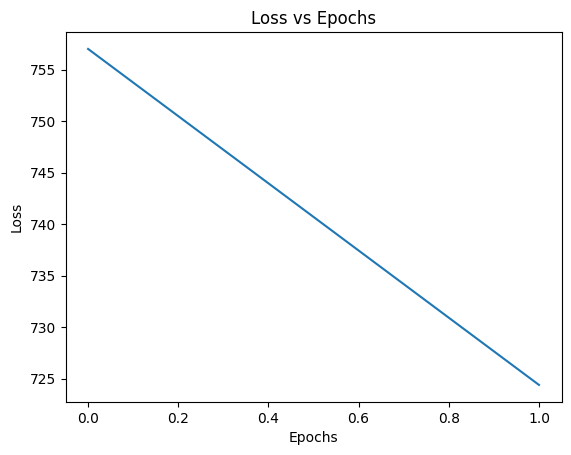

In [69]:
loss_list = []
b = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(1.0, requires_grad=True)
for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += torch.sum((y_p - y[j]) ** 2)
    
    loss = loss / len(x)
    loss_list.append(loss.item())
    
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Question 3
Revise the linear regression model by defining a user defined class titled RegressionModel with two parameters w and b as its member variables. 

Define a constructor to initialize w and b with value 1. Define four member functions namely forward(x) to implement wx+b, update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp) to implement MSE Loss given the predicted y value yp and the target label y. 

Define an object of this class named model and invoke all the methods. Plot the graph of epoch vs loss by varying epoch to 100 iterations.

```x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])```

```y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])```

```learning_rate = torch.tensor(0.001)```

In [31]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)
    def forward(self, x):
        return self.w * x + self.b
    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
def criterion(yj, y_p):
    return (yj - y_p)**2

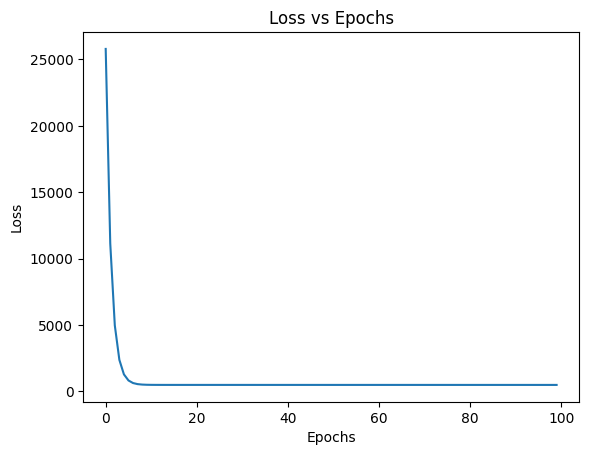

In [36]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion (y[j], y_p)
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        model.update()
    model.reset_grad()

#     print("The parameters are w={}, b={}, and loss={}".format(model.w, model.b, loss.item()))
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Question4
Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

Epoch 1/100, Loss: 876.4370
Epoch 2/100, Loss: 872.6201
Epoch 3/100, Loss: 868.8199
Epoch 4/100, Loss: 865.0363
Epoch 5/100, Loss: 861.2689
Epoch 6/100, Loss: 857.5182
Epoch 7/100, Loss: 853.7838
Epoch 8/100, Loss: 850.0656
Epoch 9/100, Loss: 846.3635
Epoch 10/100, Loss: 842.6776
Epoch 11/100, Loss: 839.0079
Epoch 12/100, Loss: 835.3541
Epoch 13/100, Loss: 831.7163
Epoch 14/100, Loss: 828.0944
Epoch 15/100, Loss: 824.4880
Epoch 16/100, Loss: 820.8976
Epoch 17/100, Loss: 817.3228
Epoch 18/100, Loss: 813.7635
Epoch 19/100, Loss: 810.2197
Epoch 20/100, Loss: 806.6915
Epoch 21/100, Loss: 803.1785
Epoch 22/100, Loss: 799.6810
Epoch 23/100, Loss: 796.1985
Epoch 24/100, Loss: 792.7313
Epoch 25/100, Loss: 789.2794
Epoch 26/100, Loss: 785.8422
Epoch 27/100, Loss: 782.4202
Epoch 28/100, Loss: 779.0131
Epoch 29/100, Loss: 775.6207
Epoch 30/100, Loss: 772.2433
Epoch 31/100, Loss: 768.8806
Epoch 32/100, Loss: 765.5323
Epoch 33/100, Loss: 762.1989
Epoch 34/100, Loss: 758.8798
Epoch 35/100, Loss: 755

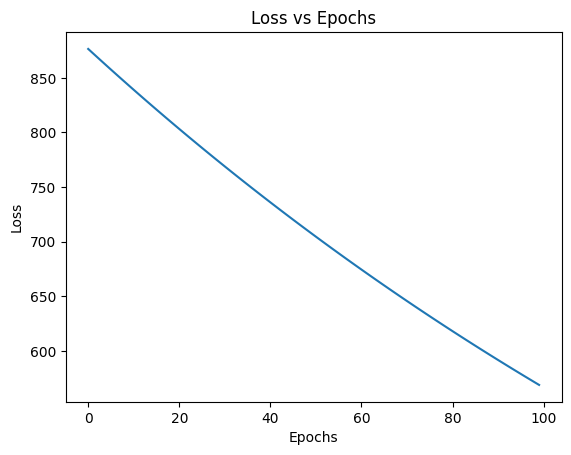

Trained model parameters: w = 2.2979538440704346, b = 0.5852426290512085


In [40]:
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD

class RegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.w = nn.Parameter(torch.rand([1]))
        self.b = nn.Parameter(torch.rand([1]))

    def forward(self, x):
        return self.w * x + self.b

def criterion(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

learning_rate = 0.0001
epochs = 100
batch_size = 2

x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

dataset = RegressionDataset(x, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = RegressionModel()
optimizer = SGD(model.parameters(), lr=learning_rate)


loss_list = []
for epoch in range(epochs):
    epoch_loss = 0.0
    for xb, yb in dataloader:
        optimizer.zero_grad()
        y_pred = model(xb)
        loss = criterion(yb, y_pred)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    loss_list.append(epoch_loss / len(dataloader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(dataloader):.4f}")

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

print(f"Trained model parameters: w = {model.w.item()}, b = {model.b.item()}")


## Question 5
Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data
provided in Qn. 1. Also plot the graph.

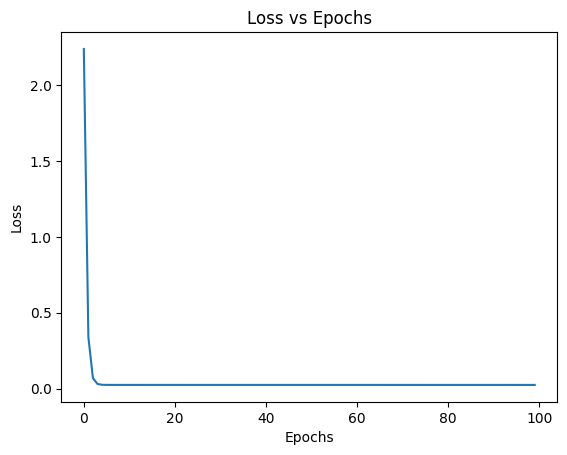

In [43]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = RegressionModel(x.shape[1])
optimizer = SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

loss_list = []

for epochs in range(100):
    model.train()
    optimizer.zero_grad()

    y_pred = model(x)
    loss = criterion(y_pred, y)

    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


## Question 6
Implement multiple linear regression for the data provided below
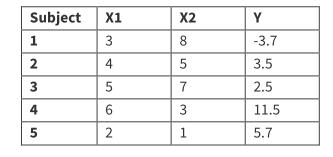
Verify your answer for the data point X1=3, X2=2.

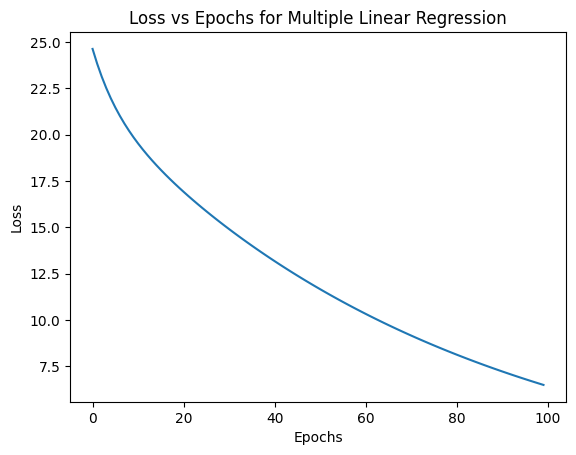

Trained model parameters: tensor([[ 1.6670, -0.7223]]), tensor([0.0263])


In [47]:
x = torch.tensor([[3.0,8.0], [4.0,5.0], [5.0,7.0], [6.0,3.0], [2.0,1.0]])
y = torch.tensor([[-3.7],[3.5],[2.5],[11.5],[5.7]])

model = RegressionModel(x.shape[1])
optimizer = SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

loss_list = []
for epoch in range(100):
    optimizer.zero_grad()
    loss = criterion(model(x), y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Multiple Linear Regression')
plt.show()

print(f"Trained model parameters: {model.linear.weight.data}, {model.linear.bias.data}")

In [49]:
input_data = torch.tensor([[3.0, 2.0]]) 
y_pred = model(input_data).item()  

print(f"Prediction for X1=3, X2=2: {y_pred}")

Prediction for X1=3, X2=2: 3.5826826095581055


## Question 7
Implement logistic regression

```x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]```

```y = [0, 0, 0, 0, 0, 1, 1, 1, 1]```

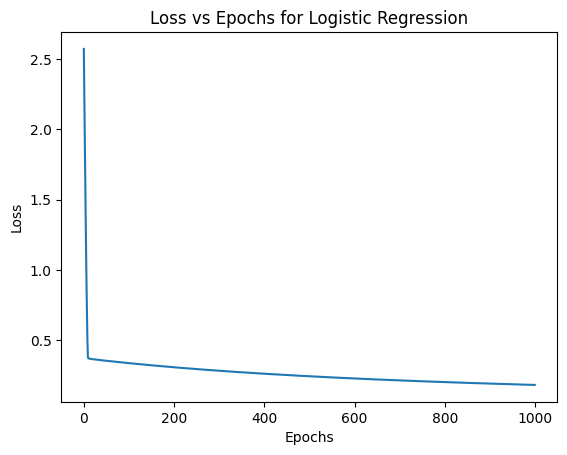

Trained model parameters: tensor([[0.0712]]), tensor([-2.0485])
Predicted probability for x=30: 0.5216269493103027


In [53]:
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  

model = LogisticRegressionModel()
optimizer = SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()  

loss_list = []
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Logistic Regression')
plt.show()

print(f"Trained model parameters: {model.linear.weight.data}, {model.linear.bias.data}")

input_data = torch.tensor([[30.0]])
predicted_prob = model(input_data).item()
print(f"Predicted probability for x=30: {predicted_prob}")


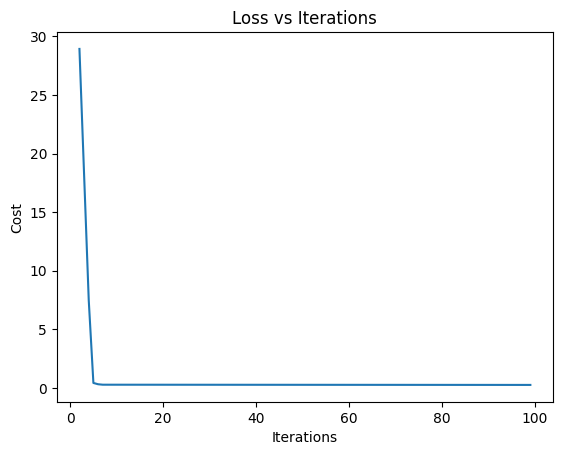

Trained w: 0.056496694684028625, b: -1.3930130004882812


In [60]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def cost_function(w, b, x, y):
    predictions = sigmoid(x @ w + b)
    return -(1/len(y)) * torch.sum(y * torch.log(predictions) + (1 - y) * torch.log(1 - predictions))

def gradient_descent(x, y, w, b, lr, iters):
    cost_list = []
    for _ in range(iters):
        predictions = sigmoid(x @ w + b)
        dw = (x.T @ (predictions - y)) / len(y)
        db = torch.sum(predictions - y) / len(y)
        w -= lr * dw
        b -= lr * db
        cost_list.append(cost_function(w, b, x, y).item())
    return w, b, cost_list

w, b = torch.randn(1, 1, dtype=torch.float32), torch.randn(1, dtype=torch.float32)
lr, iters = 0.01, 100

w, b, cost_list = gradient_descent(x, y, w, b, lr, iters)

plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations')
plt.show()

print(f"Trained w: {w.item()}, b: {b.item()}")
# print(f"Prediction for x=30: {sigmoid(torch.tensor([[30]], dtype=torch.float32) @ w + b).item()}")